# Toxic Comment Classification Challenge

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge



Lectura de train y test

In [2]:
import pandas as pd
import io
import requests
import numpy as np

# url datos en repositorio del proyecto
url_train = "https://github.com/czammar/MA_finalproject/blob/master/data/train.csv?raw=true"
url_test = "https://raw.githubusercontent.com/czammar/MA_finalproject/master/data/test.csv?raw=true"
url_test_labels = "https://github.com/czammar/MA_finalproject/blob/master/data/test_labels.csv?raw=true"

# Leemolos los datos de train, test y labels del test desde nuestro repositorio usando requesto con io
rtrain=requests.get(url_train).content
rtest=requests.get(url_test).content
rtest_labels=requests.get(url_test_labels).content

# Cargamos io hacia pandas
train = pd.read_csv(io.StringIO(rtrain.decode('utf-8')))
test = pd.read_csv(io.StringIO(rtest.decode('utf-8')))
test_labels = pd.read_csv(io.StringIO(rtest_labels.decode('utf-8')))

In [3]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


## Limpieza de datos


In [5]:
# Natural language toolkit, nos ayudara con preprocessing de los datos
import re
import nltk
#nltk.download('stopwords')

# Carga un set de stopwords predefinidas
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [6]:
# Funcion para ayudarnos a sustituir abreviaciones
def decontracted(phrase):
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [7]:
# Set adicional de stopwords, removeremos palabras tanto de este set como del que
# viene definido en el nltk
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [8]:
# Función auxiliar para remover stopwords y otras normalizaciones de texto
def remove_stopwords(dataframe):
  SYNS = []
  for sentance in dataframe:
    sentance = re.sub('\\n', ' ', sentance)
    sentance = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'', sentance)
    sentance = re.sub("\[\[User.*",'',sentance)
    sentance = re.sub("(http://.*?\s)|(http://.*)",'',sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    #sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in STOPWORDS)
    SYNS.append(sentance.strip())
  return SYNS

In [9]:
# Remueve stopwords
synops_train = remove_stopwords(train['comment_text'])

In [10]:
#Los primeros 5 comentarios quedan como sigue
synops_train[:5]

['Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They were not vandalisms just closure on some GAs after I voted at New York Dolls FAC And please do not remove the template from the talk page since I am retired now',
 'D aww He matches this background colour I am seemingly stuck with Thanks talk January UTC',
 'Hey man I am really not trying to edit war It is just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info',
 'More I can not make any real suggestions on improvement I wondered if the section statistics should be later on or a subsection of types of accidents I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know 

In [11]:
train['clean_text'] = synops_train

In [12]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I am really not trying to edit war It ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can not make any real suggestions on im...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember wh...
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,And for the second time of asking when your vi...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,You should be ashamed of yourself That is a ho...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,Spitzer Umm theres no actual article for prost...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,And it looks like it was actually you who put ...


## Sets

In [13]:
drop_col = ['id', 'is_clean']  # columns not neccessary - can be dropped
text_col = ['comment_text']  # text feature
label_col = [col for col in train.columns if col not in text_col + drop_col] 

In [14]:
#Dividir train en train y test  20% train y 80% test
import random
random.seed(10)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['comment_text'], 
                                                  train[label_col], test_size=0.2, random_state=2019)

print('Data points in train data after splitting:', len(X_train))
print('Data points in valiadtion data:', len(X_test))

Data points in train data after splitting: 127656
Data points in valiadtion data: 31915


Toxico conteo

In [15]:
y_train[y_train['toxic']==1].count()

toxic            12171
severe_toxic     12171
obscene          12171
threat           12171
insult           12171
identity_hate    12171
clean_text       12171
dtype: int64

In [16]:
y_test[y_test['toxic']==1].count()

toxic            3123
severe_toxic     3123
obscene          3123
threat           3123
insult           3123
identity_hate    3123
clean_text       3123
dtype: int64

In [32]:
#Proporción en test
3123/(3123+12171)

0.20419772459788152

Severe_toxic conteo

In [17]:
y_train[y_train['severe_toxic']==1].count()

toxic            1264
severe_toxic     1264
obscene          1264
threat           1264
insult           1264
identity_hate    1264
clean_text       1264
dtype: int64

In [18]:
y_test[y_test['severe_toxic']==1].count()

toxic            331
severe_toxic     331
obscene          331
threat           331
insult           331
identity_hate    331
clean_text       331
dtype: int64

In [33]:
#Proporción en test
331/(331+1264)

0.20752351097178684

Obscene conteo

In [20]:
y_train[y_train['obscene']==1].count()

toxic            6696
severe_toxic     6696
obscene          6696
threat           6696
insult           6696
identity_hate    6696
clean_text       6696
dtype: int64

In [19]:
y_test[y_test['obscene']==1].count()

toxic            1753
severe_toxic     1753
obscene          1753
threat           1753
insult           1753
identity_hate    1753
clean_text       1753
dtype: int64

In [27]:
#Proporción en test
1753/(1753+6696)

0.20748017516865902

Threat conteo

In [21]:
y_train[y_train['threat']==1].count()

toxic            384
severe_toxic     384
obscene          384
threat           384
insult           384
identity_hate    384
clean_text       384
dtype: int64

In [22]:
y_test[y_test['threat']==1].count()

toxic            94
severe_toxic     94
obscene          94
threat           94
insult           94
identity_hate    94
clean_text       94
dtype: int64

In [28]:
#Proporción en test
94/(94+384)

0.19665271966527198

Insult conteo

In [23]:
y_train[y_train['insult']==1].count()

toxic            6254
severe_toxic     6254
obscene          6254
threat           6254
insult           6254
identity_hate    6254
clean_text       6254
dtype: int64

In [24]:
y_test[y_test['insult']==1].count()

toxic            1623
severe_toxic     1623
obscene          1623
threat           1623
insult           1623
identity_hate    1623
clean_text       1623
dtype: int64

In [29]:
#Proporción en test
1623/(1623+6254)

0.2060429097372096

Identity hate conteo

In [25]:
y_train[y_train['identity_hate']==1].count()

toxic            1088
severe_toxic     1088
obscene          1088
threat           1088
insult           1088
identity_hate    1088
clean_text       1088
dtype: int64

In [26]:
y_test[y_test['identity_hate']==1].count()

toxic            317
severe_toxic     317
obscene          317
threat           317
insult           317
identity_hate    317
clean_text       317
dtype: int64

In [31]:
#Proporción en test
317/(317+1088)

0.22562277580071174

In [ ]:
#y_train.to_csv("train.csv")
#y_test.to_csv("test.csv")

**Conteos de comentarios**

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS

sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

In [18]:
x0=y_train.iloc[:,:6].sum()

In [19]:
import pandas as pd
xo = pd.DataFrame(list(x0.items()))
xo.columns = ["type", "comment"]
xo = xo.sort_values(['comment']).reset_index(drop=True)
#xo['%'] = xo.comment / xo.comment.sum()

In [20]:
xo

,type,comment
0,threat,384
1,identity_hate,1088
2,severe_toxic,1264
3,insult,6254
4,obscene,6696
5,toxic,12171


In [ ]:
#plot
#plt.figure(figsize=(16,8))
#ax= sns.barplot(xo.type, xo.comment, alpha=0.5, palette="rocket")

#plt.title("Cantidad de ocurrencias por tipo de comentario")
#plt.ylabel('# de ocurrencias', fontsize=20)
#plt.xlabel('Tipo de comentario ', fontsize=20)

#loop para agregar eqtiuetas
#rects = ax.patches
#labels = x0.values
#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height + 5,label,size=15, ha='center', va='bottom')

#plt.show()

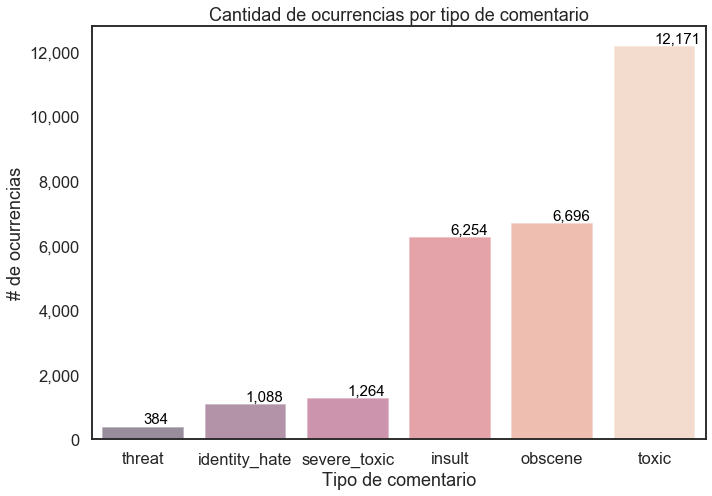

In [21]:
xo = xo.sort_values(['comment']).reset_index(drop=True)

plt.figure(figsize=(10,7))
# plot barh chart with index as x values
ax = sns.barplot(xo.type, xo.comment,alpha=0.5, palette="rocket")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Tipo de comentario", ylabel='# de ocurrencias')
plt.title("Cantidad de ocurrencias por tipo de comentario")
# add proper Dim values as x labels
ax.set_xticklabels(xo.type)
for item in ax.get_xticklabels(): item.set_rotation(0)
for i, v in enumerate(xo["comment"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black', va ='bottom',size=15)
plt.tight_layout()
plt.show()

In [22]:
rowsums=y_train.iloc[:,:6].sum(axis=1)
y_train['clean']=(rowsums==0)
#x=y_train.iloc[:,:6].sum()

In [23]:
total_clean=y_train.loc[y_train['clean'] == True].count()
#total_clean

In [29]:
#Yalidt
prueba=y_train[:20]
prueba


,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text,clean
15176,0,0,0,0,0,0,Baker removed the picture primarily as an atta...,True
64290,0,0,0,0,0,0,Image Peter macnicol jpg Thanks for uploading ...,True
64709,0,0,0,0,0,0,Is the UK multinational An editor had added th...,True
87891,0,0,0,0,0,0,Please do not remove messages from your talk p...,True
98308,0,0,0,0,0,0,Images Wikipedia Picture tutorial,True
13529,0,0,0,0,0,0,Request for change in lead I tried to personal...,True
41231,0,0,0,0,0,0,Think of it as prophylaxis,True
149156,0,0,0,0,0,0,I believe it is rolling out slowly I had an op...,True
71874,0,0,0,0,0,0,I forgot to thank Zenanarh and DIREKTOR withou...,True
38640,0,0,0,0,0,0,Geoff Boycott describes the organisation of th...,True


Ahora añadimos los que no pertenecen a esas categorias:



In [48]:
rowsums=prueba.iloc[:,0:].sum(axis=0)
rowsums

toxic             3.0
severe_toxic      0.0
obscene           1.0
threat            0.0
insult            1.0
identity_hate     0.0
clean            27.0
dtype: float64

In [106]:
#prueba.iloc[:,0:-1]

In [30]:
del y_train['clean_text']

In [31]:
#Dataframe que incluye los clean
rowsums=y_train.iloc[:,0:].sum(axis=0)
rowsums = pd.DataFrame(list(rowsums.items()))
rowsums.columns = ["type", "comment"]
rowsums = rowsums.sort_values(['comment']).reset_index(drop=True)
rowsums['%'] = rowsums.comment /rowsums['comment'].sum()
rowsums

,type,comment,%
0,threat,384.0,0.002693
1,identity_hate,1088.0,0.007630
2,severe_toxic,1264.0,0.008864
3,insult,6254.0,0.043858
4,obscene,6696.0,0.046958
5,toxic,12171.0,0.085352
6,clean,114740.0,0.804645


In [32]:
#rowsums=y_train.iloc[:,0:].sum(axis=1)
#train['clean']=(rowsums==0)
#x=train.iloc[:,2:].sum() 

#plot
#plt.figure(figsize=(16,8))
#ax= sns.barplot(rowsums.index, rowsums.values, alpha=0.5, palette="rocket")

#plt.title("Cantidad de ocurrencias por tipo")
#plt.ylabel('# de ocurrencias', fontsize=20)
#plt.xlabel('Tipo de comentario ', fontsize=20)

#loop para agregar eqtiuetas
#rects = ax.patches
#labels = x.values
#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
#ax.invert_xaxis

#plt.show()

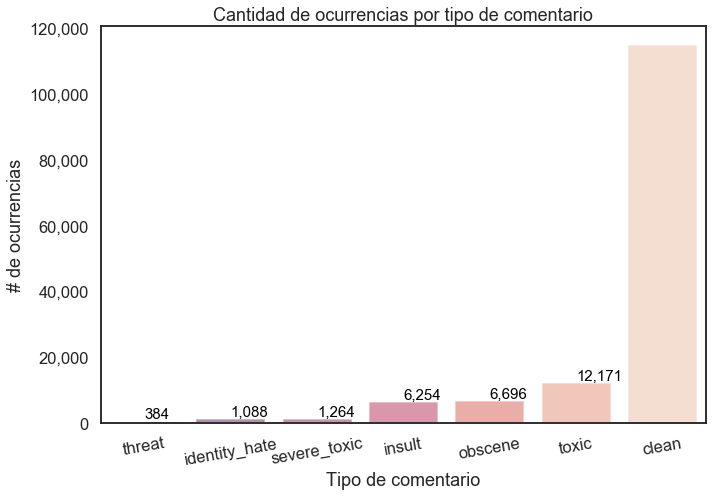

In [33]:
rowsums = rowsums.sort_values(['comment']).reset_index(drop=True)

plt.figure(figsize=(10,7))
# plot barh chart with index as x values
ax = sns.barplot(rowsums.type, rowsums.comment,alpha=0.5, palette="rocket")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Tipo de comentario", ylabel='# de ocurrencias')
plt.title("Cantidad de ocurrencias por tipo de comentario")
# add proper Dim values as x labels
ax.set_xticklabels(rowsums.type)
for item in ax.get_xticklabels(): item.set_rotation(10)
for i, v in enumerate(xo["comment"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='black', va ='bottom',size=15)
plt.tight_layout()
plt.show()

In [34]:
rowsums=y_train.iloc[:,:6].sum(axis=1)
y_train['clean']=(rowsums==0)
x=y_train.iloc[:,:6].sum()   #Suma las etiquetas de todas las clases incluyendo los clean

x1 = pd.DataFrame(list(x.items()))
x1.columns = ["type", "comment"]
x1 = x1.sort_values(['comment']).reset_index(drop=True)

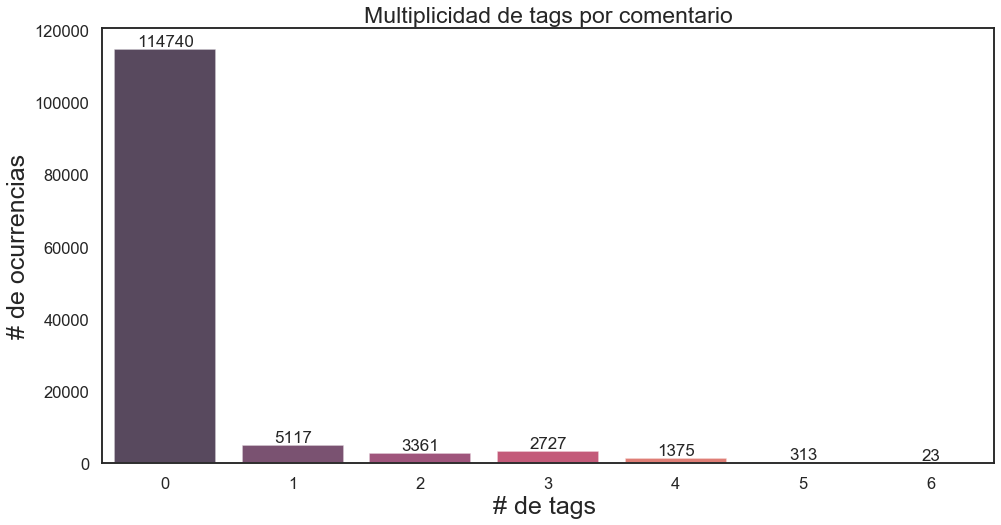

In [35]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(16,8))
ax = sns.barplot(x.index, x.values, alpha=0.8,palette="rocket")
plt.title("Multiplicidad de tags por comentario",fontsize=23)
plt.ylabel('# de ocurrencias', fontsize=25)
plt.xlabel('# de tags ', fontsize=25)

#loop para agregar labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label,
            size=17, ha='center', va='bottom')

plt.show()

**Tablas de contingencia**

In [36]:
temp_df=y_train.iloc[:,0:-1]
#temp_df

In [37]:
#del temp_df["clean_text"]
#del temp_df["clean"]

In [38]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
#out = out.style.apply(highlight_min,axis=0)  127656  127656  127656
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  115485     0  115070   415  115461   24  115056   429   
1                   10907  1264    5890  6281   11811  360    6346  5825   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   115408    77  
1                    11160  1011

In [39]:
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
#out = out.style.apply(highlight_min,axis=0)
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  115485     0  115070   415  115461   24  115056   429   
1                   10907  1264    5890  6281   11811  360    6346  5825   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   115408    77  
1                    11160  1011

In [40]:
main_col="toxic"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['severe_toxic', 'obscene', 'threat', 'insult','identity_hate']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

severe_toxic             obscene              threat            \
severe_toxic            0         1         0         1         0         1   
toxic                                                                         
0                0.904658  0.000000  0.901407  0.003251  0.904470  0.000188   
1                0.085441  0.009902  0.046140  0.049203  0.092522  0.002820   

                insult           identity_hate            
severe_toxic         0         1             0         1  
toxic                                                     
0             0.901297  0.003361      0.904055  0.000603  
1             0.049712  0.045630      0.087422  0.007920

In [41]:
temp_df.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [42]:
main_col="severe_toxic"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'obscene', 'threat', 'insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic             obscene              threat            \
toxic                0         1         0         1         0         1   
severe_toxic                                                               
0             0.904658  0.085441  0.947100  0.042998  0.987819  0.002280   
1             0.000000  0.009902  0.000447  0.009455  0.009173  0.000729   

                insult            
toxic                0         1  
severe_toxic                      
0             0.949568  0.040531  
1             0.001441  0.008460

In [43]:
main_col="obscene"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'threat', 'insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic           severe_toxic              threat            \
toxic           0         1            0         1         0         1   
obscene                                                                  
0        0.901407  0.046140     0.947100  0.000447  0.946434  0.001112   
1        0.003251  0.049203     0.042998  0.009455  0.050558  0.001896   

           insult            
toxic           0         1  
obscene                      
0        0.936838  0.010708  
1        0.014171  0.038283

In [44]:
main_col="threat"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'obscene','insult']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic           severe_toxic             obscene            \
toxic          0         1            0         1         0         1   
threat                                                                  
0       0.904470  0.092522     0.987819  0.009173  0.946434  0.050558   
1       0.000188  0.002820     0.002280  0.000729  0.001112  0.001896   

          insult            
toxic          0         1  
threat                      
0       0.949944  0.047048  
1       0.001065  0.001943

In [45]:
main_col="insult"
# ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult']
lista_categorias=['toxic', 'severe_toxic', 'obscene', 'threat']
corr_mats=[]

for other_col in lista_categorias:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix/127656)
out = pd.concat(corr_mats,axis=1,keys=lista_categorias)

out

toxic           severe_toxic             obscene            \
toxic          0         1            0         1         0         1   
insult                                                                  
0       0.901297  0.049712     0.949568  0.001441  0.936838  0.014171   
1       0.003361  0.045630     0.040531  0.008460  0.010708  0.038283   

          threat            
toxic          0         1  
insult                      
0       0.949944  0.001065  
1       0.047048  0.001943

In [46]:
y_train = pd.read_csv("train.csv")

In [47]:
y_train

,Unnamed: 0,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,15176,0,0,0,0,0,0,Baker removed the picture primarily as an atta...
1,64290,0,0,0,0,0,0,Image Peter macnicol jpg Thanks for uploading ...
2,64709,0,0,0,0,0,0,Is the UK multinational An editor had added th...
3,87891,0,0,0,0,0,0,Please do not remove messages from your talk p...
4,98308,0,0,0,0,0,0,Images Wikipedia Picture tutorial
...,...,...,...,...,...,...,...,...
127651,25373,0,0,0,0,0,0,SeaQuest DSV A few notes about the edit to the...
127652,32472,1,0,0,0,0,0,You see this as an attack Get a life Peterklutz
127653,12069,0,0,0,0,0,0,small It is called Kraft Dinner in Canada and ...
127654,60575,0,0,0,0,0,0,Oh yes And a question As we move forward with ...


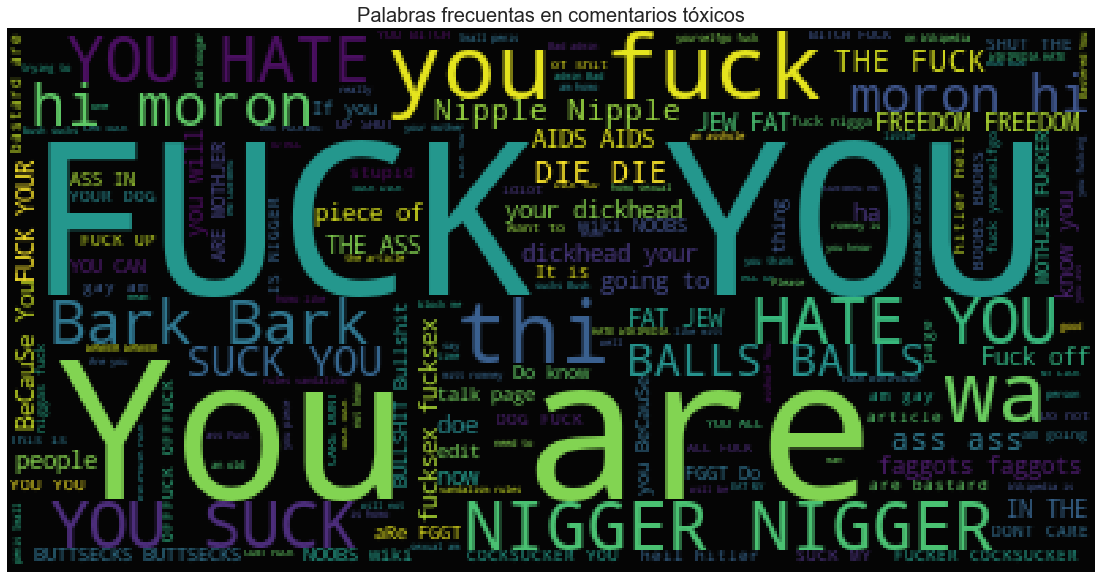

In [48]:
rnd_comments = y_train[y_train['toxic'] == 1].sample(n=10000)['clean_text'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update())
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Palabras frecuentas en comentarios tóxicos", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

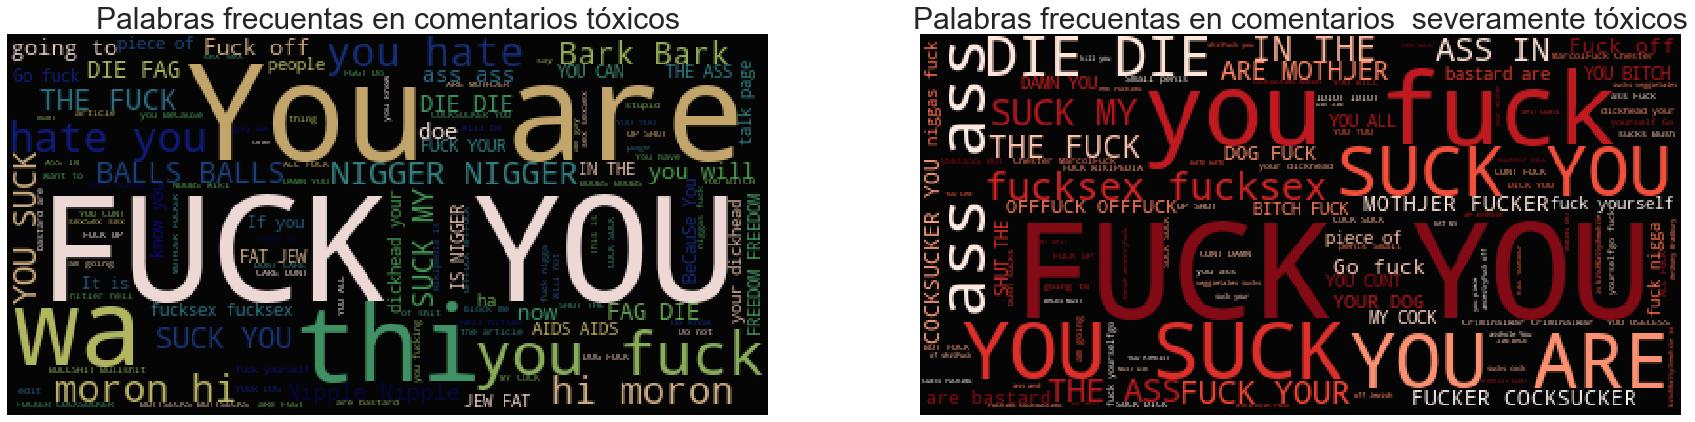

In [49]:
#wordcloud for clean comments
#Toxic comments
subset=y_train[y_train.toxic==1] #subsetting only those records which are classified as toxic
text=subset.clean_text.values #getting the words
wc= WordCloud(background_color="black",max_words=3000,stopwords=STOPWORDS.update()) #creating a word cloud 
wc.generate(" ".join(text)) #generating text 
plt.figure(figsize=(30,30)) #figure dimensions
plt.subplot(221) #as we are plotting multiple plots writing it as subset 
plt.axis("off")
plt.title("Palabras frecuentas en comentarios tóxicos", fontsize=30)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

#Severely toxic comments
plt.subplot(222)
#severe_toxic_mask=np.array(Image.open("bomb.jpg"))
#severe_toxic_mask=severe_toxic_mask[:,:,1]
subset=y_train[y_train.severe_toxic==1]
text=subset.clean_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=STOPWORDS.update())
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Palabras frecuentas en comentarios  severamente tóxicos", fontsize=30)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)


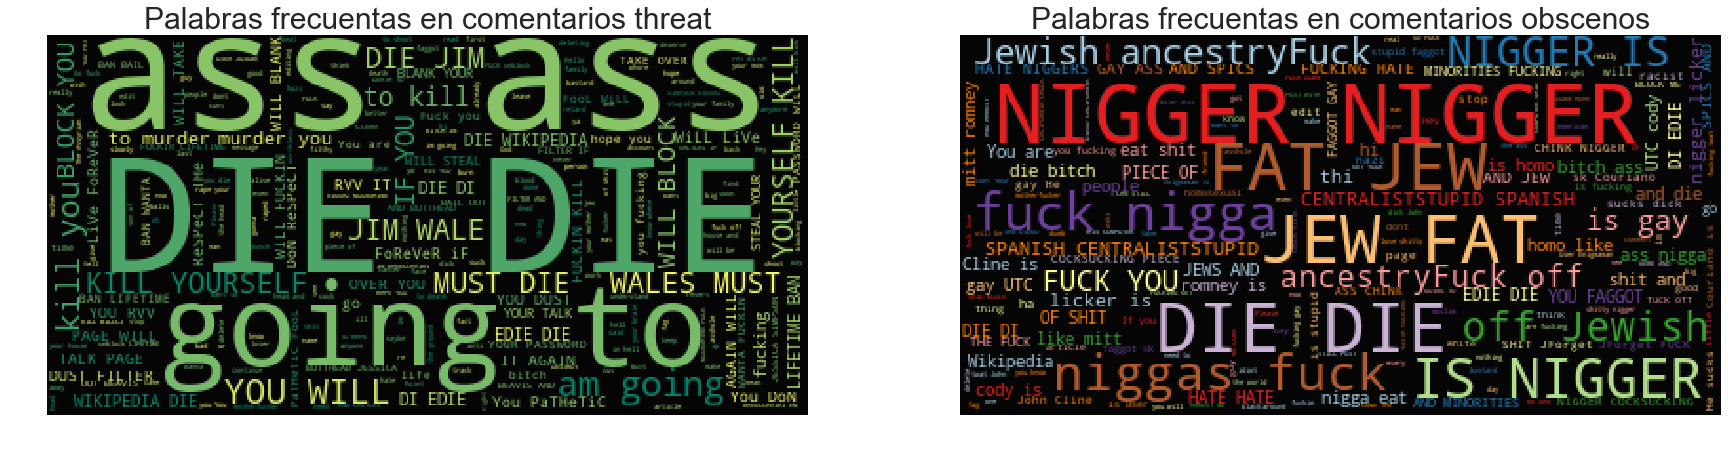

In [177]:
#Threat comments
subset=y_train[y_train.threat==1]
text=subset.clean_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=STOPWORDS.update())
wc.generate(" ".join(text))
plt.figure(figsize=(30,30)) #figure dimensions
plt.subplot(223) #as we are plotting multiple plots writing it as subset
plt.axis("off")
plt.title("Palabras frecuentas en comentarios threat", fontsize=30)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)

#Obscene comments
plt.subplot(224)
subset=y_train[y_train.identity_hate==1]
text=subset.clean_text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=STOPWORDS.update())
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Palabras frecuentas en comentarios obscenos", fontsize=30)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=2534), alpha=0.98)

(6.0, 0.0)

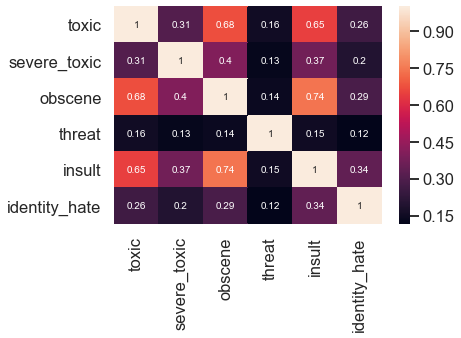

In [50]:
corr=temp_df.corr()
ax = sns.heatmap(corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## TOP Unigramas y Bigramas

/Users/danahiramos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.
/Users/danahiramos/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: num must be 1 <= num <= 6, not 7

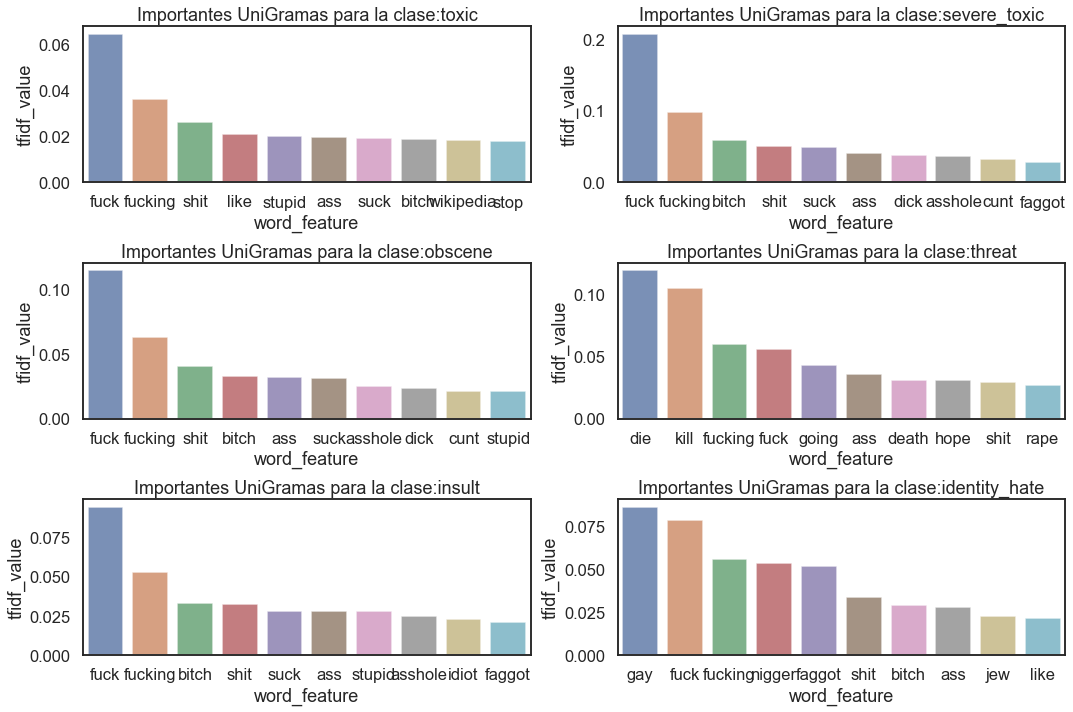

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize # Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer

def get_topn_tfidf_feat_byClass(X_tfidf, t, feature_names, labels, topn):
    
    feat_imp_dfs = {}
    
    for label in labels:
        # get indices of rows where label is true
        label_ids = y_train.index[y_train[label] == 1]
        # get subset of rows
        label_rows = X_tfidf[label_ids].toarray()
        # calc mean feature importance
        feat_imp = label_rows.mean(axis = 0)
        # sort by column dimension and get topn feature indices
        topn_ids = np.argsort(feat_imp)[::-1][:topn]
        # combine tfidf value with feature name
        topn_features = [(feature_names[i], feat_imp[i]) for i in topn_ids]
        # df
        topn_df = pd.DataFrame(topn_features, columns = ['word_feature', 'tfidf_value'])
        # save 
        feat_imp_dfs[label] = topn_df
    return feat_imp_dfs

tfidf = TfidfVectorizer(ngram_range = (1,1), min_df = 100, 
                        strip_accents='unicode', analyzer='word',
                        use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english')
X_unigrams = tfidf.fit_transform(y_train['clean_text'].values.astype('U'))
X_unigrams.shape, len(tfidf.get_feature_names())


feature_names = np.array(tfidf.get_feature_names())
imp_dfs = get_topn_tfidf_feat_byClass(X_unigrams, y_train, feature_names, label_col, topn = 10)

plt.figure(figsize=(15,10))

for i, label in enumerate(label_col):
    plt.subplot(3, 2, i+1 )
    sns.barplot(imp_dfs[label].word_feature[:10], imp_dfs[label].tfidf_value[:10], alpha = 0.8)
    plt.title("Importantes UniGramas para la clase:{}".format(label))
    plt.tight_layout()

In [81]:
imp_dfs

{'toxic':   word_feature  tfidf_value
 0         fuck     0.064393
 1      fucking     0.035993
 2         shit     0.026101
 3         like     0.020916
 4       stupid     0.020200
 5          ass     0.019410
 6         suck     0.019282
 7        bitch     0.018598
 8    wikipedia     0.018134
 9         stop     0.017691, 'severe_toxic':   word_feature  tfidf_value
 0         fuck     0.207562
 1      fucking     0.098571
 2        bitch     0.058934
 3         shit     0.051148
 4         suck     0.048499
 5          ass     0.041275
 6         dick     0.038446
 7      asshole     0.036867
 8         cunt     0.032523
 9       faggot     0.028489, 'obscene':   word_feature  tfidf_value
 0         fuck     0.115078
 1      fucking     0.063407
 2         shit     0.040606
 3        bitch     0.033393
 4          ass     0.032462
 5         suck     0.031730
 6      asshole     0.025559
 7         dick     0.023836
 8         cunt     0.021717
 9       stupid     0.021112, 'threa

/Users/danahiramos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.
/Users/danahiramos/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: num must be 1 <= num <= 6, not 7

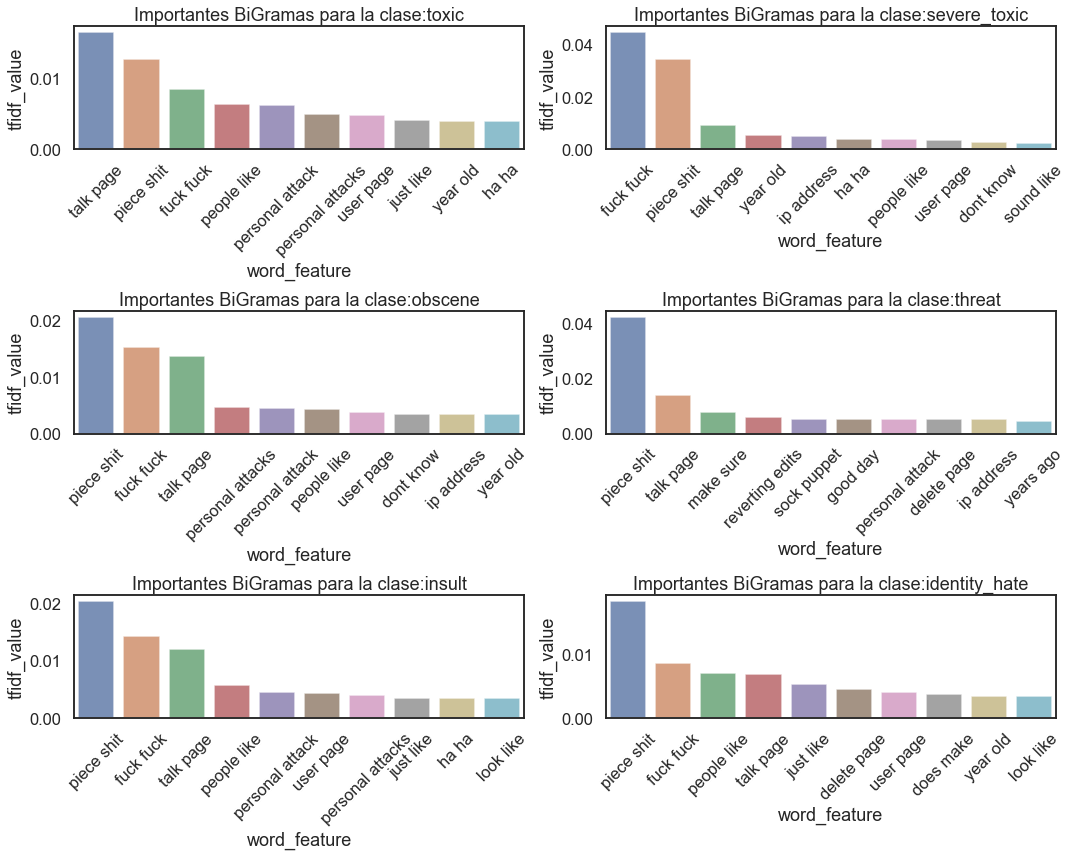

In [78]:
tfidf = TfidfVectorizer(ngram_range = (2,2), min_df = 100, 
                        strip_accents='unicode', analyzer='word',
                        use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english')

X_bigrams = tfidf.fit_transform(y_train['clean_text'].values.astype('U'))
X_bigrams.shape, len(tfidf.get_feature_names())

feature_names = np.array(tfidf.get_feature_names())
imp_dfs = get_topn_tfidf_feat_byClass(X_bigrams, y_train, feature_names, label_col, topn = 10)

plt.figure(figsize=(15,12))

for i, label in enumerate(label_col):
    plt.subplot(3, 2, i + 1)
    by_class = sns.barplot(imp_dfs[label].word_feature[:10], imp_dfs[label].tfidf_value[:10], alpha = 0.8)
    plt.title("Importantes BiGramas para la clase:{}".format(label))
    for item in by_class.get_xticklabels():
        item.set_rotation(45)
    plt.tight_layout()

In [79]:
imp_dfs

{'toxic':        word_feature  tfidf_value
 0         talk page     0.016395
 1        piece shit     0.012591
 2         fuck fuck     0.008383
 3       people like     0.006268
 4   personal attack     0.006128
 5  personal attacks     0.004920
 6         user page     0.004840
 7         just like     0.004077
 8          year old     0.004009
 9             ha ha     0.003929, 'severe_toxic':   word_feature  tfidf_value
 0    fuck fuck     0.044724
 1   piece shit     0.034334
 2    talk page     0.009200
 3     year old     0.005256
 4   ip address     0.005043
 5        ha ha     0.003956
 6  people like     0.003902
 7    user page     0.003630
 8    dont know     0.002920
 9   sound like     0.002373, 'obscene':        word_feature  tfidf_value
 0        piece shit     0.020607
 1         fuck fuck     0.015237
 2         talk page     0.013664
 3  personal attacks     0.004706
 4   personal attack     0.004545
 5       people like     0.004362
 6         user page     0.003729